In [1]:
#Importing libraries

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense, Flatten, BatchNormalization,Conv2D , MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
#Loading the MNIST dataset

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("No of training exapmles "+str(x_train.shape[0]))
print("No of Test exapmles "+str(x_test.shape[0]))
print("Shape of Each Image "+str(x_train[0].shape))

No of training exapmles 60000
No of Test exapmles 10000
Shape of Each Image (28, 28)


60000
This is image of Number 7


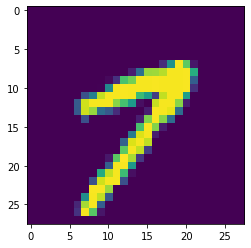

In [3]:
c=0
ll=[]
#Visualizing the trainig set
for i in y_train:
    
    if i==7:
        ll.append(c)
        pass
    c+=1
    
print(c)        
def display():
    id = ll[6]
    img = x_train[id]
    l = y_train[id]
    plt.imshow(img)
    print("This is image of Number "+str(l))
display()

###### Preprocessing data

x_train = x_train.reshape(x_train.shape[0],28,28,1)/255
x_test = x_test.reshape(x_test.shape[0],28,28,1)/255

In [4]:
#Our Model

model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [5]:
#Our Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [7]:
#Compile and Run

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.fit(x_train,y_train,batch_size=128,validation_data=(x_test,y_test),epochs=30)

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
#Loss and accuracy of Test set

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])